# Agglomerative Clustering By Dania

In [34]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import metrics

%matplotlib inline



In [61]:
df = pd.read_csv("clean_data.csv")
df.head(10)

,Company,Opening,Top,Lowest,Closing,Change,Change %,Traded Quantity,Trading value (SAR),Sector
0,أرامكو السعودية,34.85,35.15,26.80,27.95,-6.90,-19.80,"5,543,658,787.00","2,085,715,602.30",الطاقة
1,أديس,17.54,26.10,14.84,20.48,2.94,16.76,"1,560,799,272.00","66,412,733.50",الطاقة
2,بترو رابغ,10.56,11.06,6.58,8.20,-2.36,-22.35,"629,672,963.00","108,450,108.56",الطاقة
3,البحري,23.52,30.40,21.36,29.60,6.08,25.85,"163,385,654.00","14,383,934.25",الطاقة
4,الدريس,102.49,147.81,82.53,123.20,20.71,20.21,"96,635,167.00","42,924,622.80",الطاقة
5,الحفر العربية,187.80,214.20,112.00,117.60,-70.20,-37.38,"78,415,952.00","102,937,306.00",الطاقة
6,المصافي,84.40,99.70,67.80,76.70,-7.70,-9.12,"45,668,469.00","4,365,966.90",الطاقة
7,الكثيري,3.08,3.38,2.37,2.85,-0.23,-7.47,"785,122,007.00","19,301,370.69",المواد الأساسية
8,كيان السعودية,12.36,13.22,7.63,8.61,-3.75,-30.34,"614,707,367.00","35,791,181.12",المواد الأساسية
9,التصنيع,12.88,15.08,10.54,11.24,-1.64,-12.73,"551,672,530.00","24,921,526.34",المواد الأساسية


In [37]:
df.shape

(209, 10)

In [40]:
# Selecting relevant numerical columns for clustering
numerical_features = df[['Opening', 'Top', 'Lowest', 'Closing', 'Change', 'Change %']]

# Standardizing the data using RobustScaler
robust_scaler = RobustScaler()
scaled_robust = robust_scaler.fit_transform(numerical_features)

In [41]:
# Standardizing the data using StandardScaler
standard_scaler = StandardScaler()
scaled_standard = standard_scaler.fit_transform(numerical_features)


In [42]:
# Apply Principal Component Analysis (PCA) 
pca = PCA(n_components = 3)  # Initialize PCA to reduce to 3 dimensions
pca.fit(scaled_robust)
PCA_scaled = pca.transform(scaled_robust)  # Fit PCA and transform the scaled features


In [43]:
feature_names = ['Opening', 'Top', 'Lowest', 'Closing', 'Change', 'Change %']

components = pca.components_
# Create a DataFrame to display the principal component loadings
components_df = pd.DataFrame(components, columns=
feature_names, index=[f'PC{i+1}' for i in range(components.shape[0])])

# Print the principal components (loadings) DataFrame
print("Principal Components (loadings):")
print(components_df)


Principal Components (loadings):
     Opening   Top  Lowest  Closing  Change  Change %
PC1     0.42  0.41    0.41     0.47    0.51      0.10
PC2    -0.38 -0.16   -0.32    -0.14    0.77      0.35
PC3     0.09  0.05    0.06    -0.00   -0.34      0.93


In [44]:
# Convert PCA results to DataFrame
df_PCA = pd.DataFrame(PCA_scaled, columns=['PC1', 'PC2', 'PC3'])

In [45]:
agg_robust = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_standardg = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_PCA = AgglomerativeClustering(n_clusters=4, linkage='ward')

In [46]:
clusters_robust = agg_robust.fit_predict(scaled_robust)
clusters_standard = agg_standardg.fit_predict(scaled_standard)
clusters_PCA = agg_standardg.fit_predict(PCA_scaled)

In [48]:
df_robust = df.copy()
df_standard = df.copy()
df_standard = df.copy()

In [49]:
# Add the cluster labels to the original dataframe
df_robust['Cluster'] = clusters_robust
df_robust.head()

,Company,Opening,Top,Lowest,Closing,Change,Change %,Traded Quantity,Trading value (SAR),Sector,Cluster
0,أرامكو السعودية,34.85,35.15,26.80,27.95,-6.90,-19.80,"5,543,658,787.00","2,085,715,602.30",الطاقة,1
1,أديس,17.54,26.10,14.84,20.48,2.94,16.76,"1,560,799,272.00","66,412,733.50",الطاقة,1
2,بترو رابغ,10.56,11.06,6.58,8.20,-2.36,-22.35,"629,672,963.00","108,450,108.56",الطاقة,1
3,البحري,23.52,30.40,21.36,29.60,6.08,25.85,"163,385,654.00","14,383,934.25",الطاقة,1
4,الدريس,102.49,147.81,82.53,123.20,20.71,20.21,"96,635,167.00","42,924,622.80",الطاقة,0


In [50]:
df_robust['Cluster'].value_counts()

Cluster
1    167
0     26
3     15
2      1
Name: count, dtype: int64

In [51]:
df_robust[df_robust['Cluster'] == 2]

,Company,Opening,Top,Lowest,Closing,Change,Change %,Traded Quantity,Trading value (SAR),Sector,Cluster
167,علم,850.00,"1,125.00",671.80,"1,002.20",152.20,17.91,"27,254,120.00","176,435,267.80",التطبيقات وخدمات التقنية,2


In [52]:
df_standard['Cluster'] = clusters_standard
df_standard.head()

,Company,Opening,Top,Lowest,Closing,Change,Change %,Traded Quantity,Trading value (SAR),Sector,Cluster
0,أرامكو السعودية,34.85,35.15,26.80,27.95,-6.90,-19.80,"5,543,658,787.00","2,085,715,602.30",الطاقة,0
1,أديس,17.54,26.10,14.84,20.48,2.94,16.76,"1,560,799,272.00","66,412,733.50",الطاقة,0
2,بترو رابغ,10.56,11.06,6.58,8.20,-2.36,-22.35,"629,672,963.00","108,450,108.56",الطاقة,0
3,البحري,23.52,30.40,21.36,29.60,6.08,25.85,"163,385,654.00","14,383,934.25",الطاقة,0
4,الدريس,102.49,147.81,82.53,123.20,20.71,20.21,"96,635,167.00","42,924,622.80",الطاقة,1


In [53]:
df_standard['Cluster'].value_counts()

Cluster
0    178
1     17
3     13
2      1
Name: count, dtype: int64

In [54]:
# Concatenate the original DataFrame with the PCA results
df_PCA = pd.concat([df, df_PCA], axis=1)

In [55]:
df_PCA.head()

,Company,Opening,Top,Lowest,Closing,Change,Change %,Traded Quantity,Trading value (SAR),Sector,PC1,PC2,PC3
0,أرامكو السعودية,34.85,35.15,26.80,27.95,-6.90,-19.80,"5,543,658,787.00","2,085,715,602.30",الطاقة,-1.55,-0.96,-0.49
1,أديس,17.54,26.10,14.84,20.48,2.94,16.76,"1,560,799,272.00","66,412,733.50",الطاقة,-1.47,0.31,0.04
2,بترو رابغ,10.56,11.06,6.58,8.20,-2.36,-22.35,"629,672,963.00","108,450,108.56",الطاقة,-2.17,-0.18,-0.79
3,البحري,23.52,30.40,21.36,29.60,6.08,25.85,"163,385,654.00","14,383,934.25",الطاقة,-1.07,0.45,0.20
4,الدريس,102.49,147.81,82.53,123.20,20.71,20.21,"96,635,167.00","42,924,622.80",الطاقة,2.64,-0.47,0.01


In [56]:
df_PCA ['Cluster'] = clusters_PCA
df_PCA.head()

,Company,Opening,Top,Lowest,Closing,Change,Change %,Traded Quantity,Trading value (SAR),Sector,PC1,PC2,PC3,Cluster
0,أرامكو السعودية,34.85,35.15,26.80,27.95,-6.90,-19.80,"5,543,658,787.00","2,085,715,602.30",الطاقة,-1.55,-0.96,-0.49,0
1,أديس,17.54,26.10,14.84,20.48,2.94,16.76,"1,560,799,272.00","66,412,733.50",الطاقة,-1.47,0.31,0.04,0
2,بترو رابغ,10.56,11.06,6.58,8.20,-2.36,-22.35,"629,672,963.00","108,450,108.56",الطاقة,-2.17,-0.18,-0.79,0
3,البحري,23.52,30.40,21.36,29.60,6.08,25.85,"163,385,654.00","14,383,934.25",الطاقة,-1.07,0.45,0.20,0
4,الدريس,102.49,147.81,82.53,123.20,20.71,20.21,"96,635,167.00","42,924,622.80",الطاقة,2.64,-0.47,0.01,1


In [57]:
df_PCA['Cluster'].value_counts()

Cluster
0    182
1     23
3      3
2      1
Name: count, dtype: int64

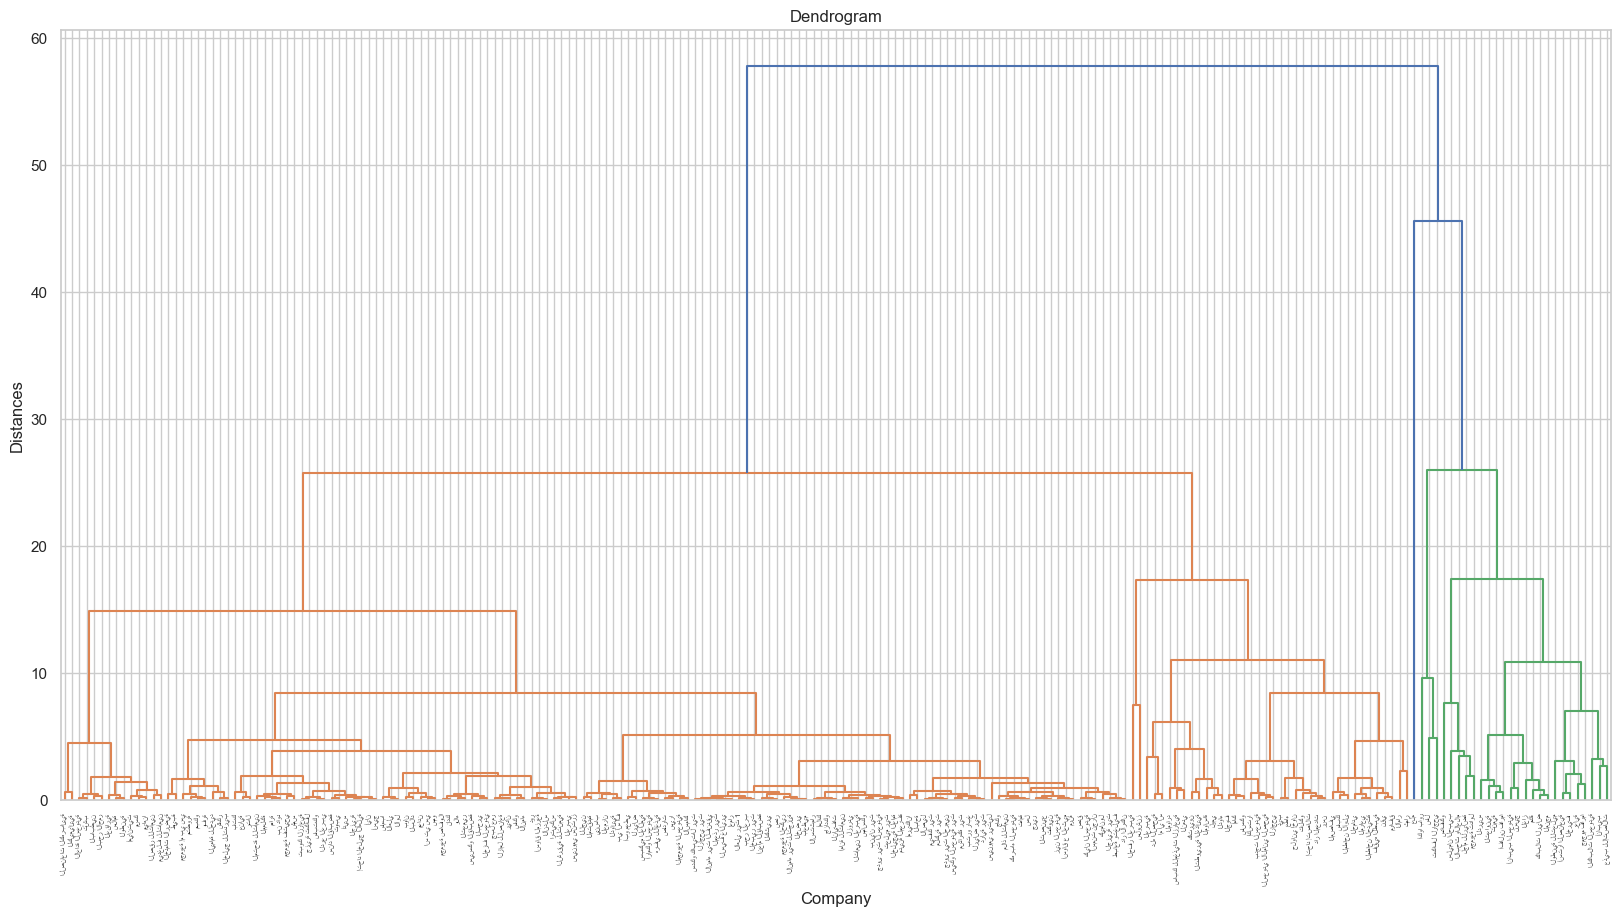

In [59]:
Z = linkage(PCA_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z, labels=df['Company'].values)
plt.title("Dendrogram")
plt.xlabel("Company")
plt.ylabel("Distances")
plt.xticks(rotation=90)
plt.height=800,
plt.width=1200
plt.show()

In [56]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Davies-Bouldin Index and Silhouette Score for Robust Scaled Data
db_index_robust = davies_bouldin_score(scaled_robust, clusters_robust)
silhouette_avg_robust = silhouette_score(scaled_robust, clusters_robust)

# Calculate Davies-Bouldin Index and Silhouette Score for Standard Scaled Data
db_index_standard = davies_bouldin_score(scaled_standard, clusters_standard)
silhouette_avg_standard = silhouette_score(scaled_standard, clusters_standard)

# Calculate Davies-Bouldin Index and Silhouette Score for PCA Scaled Data (assuming PCA_scaled is defined)
db_index_pca = davies_bouldin_score(PCA_scaled, clusters_PCA)
silhouette_avg_pca = silhouette_score(PCA_scaled, clusters_PCA)

# Print the Davies-Bouldin Index and Silhouette Scores
print(f"Davies-Bouldin Index for Robust Scaled Data: {db_index_robust:.3f}")
print(f"Silhouette Score for Robust Scaled Data: {silhouette_avg_robust:.3f}\n")

print(f"Davies-Bouldin Index for Standard Scaled Data: {db_index_standard:.3f}")
print(f"Silhouette Score for Standard Scaled Data: {silhouette_avg_standard:.3f}\n")

print(f"Davies-Bouldin Index for PCA Scaled Data: {db_index_pca:.3f}")
print(f"Silhouette Score for PCA Scaled Data: {silhouette_avg_pca:.3f}")


Davies-Bouldin Index for Robust Scaled Data: 0.705
Silhouette Score for Robust Scaled Data: 0.590

Davies-Bouldin Index for Standard Scaled Data: 0.766
Silhouette Score for Standard Scaled Data: 0.580

Davies-Bouldin Index for PCA Scaled Data: 0.576
Silhouette Score for PCA Scaled Data: 0.621


In [52]:
numeric_cols = df_robust.select_dtypes(include=['number']).columns
cluster_summary = df_robust.groupby('Cluster')[numeric_cols].mean()
print(cluster_summary)

         Opening      Top  Lowest  Closing  Change  Change %  Traded Quantity  \
Cluster                                                                         
0         113.17   209.63   98.60   179.55   66.38     70.95   105,279,684.73   
1          24.58    32.54   19.83    26.30    1.71     10.38   416,811,069.76   
2         850.00 1,125.00  671.80 1,002.20  152.20     17.91    27,254,120.00   
3         146.87   177.75  110.98   130.05  -16.82    -10.86    69,919,967.67   

         Trading value (SAR)  Cluster  
Cluster                                
0              70,371,080.88     0.00  
1              58,077,724.13     1.00  
2             176,435,267.80     2.00  
3              36,501,044.52     3.00  


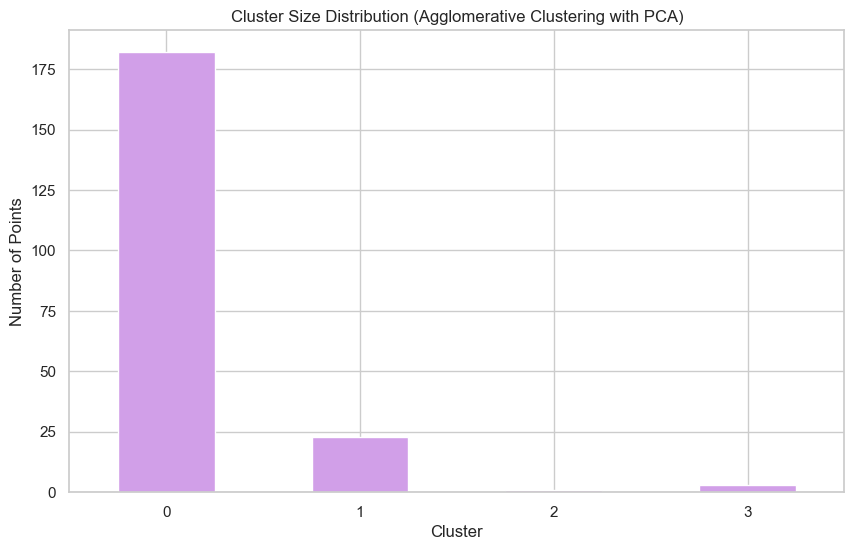

In [63]:
plt.figure(figsize=(10, 6))
df_PCA['Cluster'].value_counts().sort_index().plot(kind='bar', color='#d19fe8')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Cluster Size Distribution (Agglomerative Clustering with PCA)')
plt.xticks(rotation=0)
plt.show()